In [1]:
import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import rcParams
plt.rcParams['xtick.labelsize']  = 18
plt.rcParams['ytick.labelsize']  = 18
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family']      = 'STIXGeneral'
plt.rcParams['axes.labelsize']   = 20
plt.rcParams['axes.titlesize']   = 20
plt.rcParams['font.size']        = 10
plt.rcParams['legend.fontsize']  = 20
plt.rcParams.update({'figure.autolayout': True})
#import scienceplots
#plt.style.use(['science','ieee'])

from tqdm import tqdm
import random
import os
import time
import h5py
from datetime import datetime


import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Conv2DTranspose

# Import auxiliary libraries

import auxLib; importlib.reload(auxLib)

Importing library...
Library successfully imported
Importing library...
Library successfully imported


<module 'auxLib' from 'd:\\Facultad\\Doctorado\\Proyectos\\paper\\auxLib.py'>

# Main variables

In [2]:
L = 40

densities = [0.55, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.7, 0.8, 0.9, 1.0]

densities_str = ['055','06', '061', '062', '063', '064', '065', '07', '08', '09','1']

first_neurons = [i for i in range(1,11)]
middle_neurons = [20 * i for i in range(1,6)]
last_neurons = [50 * i for i in range(3,21)]

neurons = first_neurons + middle_neurons + last_neurons

seed = 15

callbacks = auxLib.myCallback() # to be able to stop training if accuracy is high enough

In [4]:
# Setting the directories

modelsfolder, resultsfolder = auxLib.folders(directory=None) #If None, a new folder named as today's date will be created 

# Synthetic data

In [5]:
# Initialize the synthetic image generator

data = auxLib.SyntheticImagesGen(training=['all'], L=L)

# Generate synthetic data

train_images, train_labels = data.dataGenerator(10000)
test_images, test_labels = data.dataGenerator(1000)

train_images = train_images.reshape((10000, L * L))
test_images = test_images.reshape((1000, L * L))

Generating synthetic data...
Done!
Elapsed time: 2.761913299560547 seconds
Generating synthetic data...
Done!
Elapsed time: 0.029639244079589844 seconds


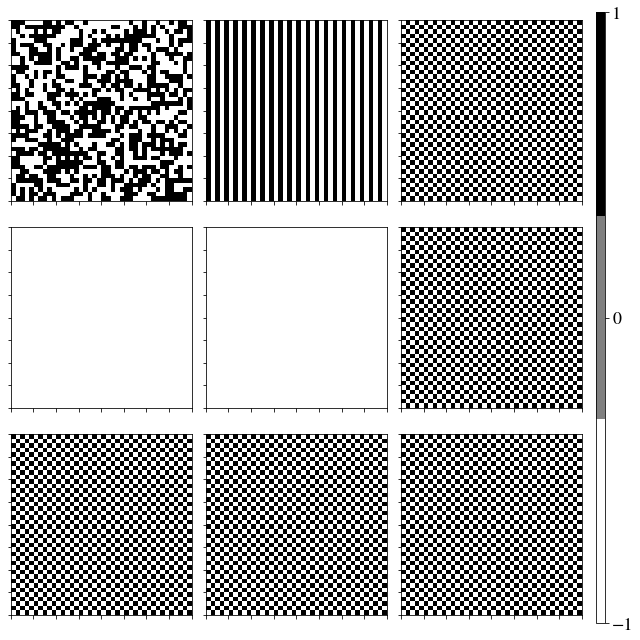

In [6]:
# Random graphs to show how to plot them

lattices_to_graph = [train_images[10 * i].reshape((L, L)) for i in range(9)]

auxLib.latticeGraph(lattices_to_graph, L)

# Neural Network

In [7]:
# Generate DNN models

for neuron in tqdm(neurons, desc=f"Generating DNN models", unit="neuron"):
    np.random.seed(seed)
    if neuron==1 or neuron==2:
        kernel_regularizer=tf.keras.regularizers.l2(0.001)
    else:   
        kernel_regularizer=tf.keras.regularizers.l2(0.01)

    dnn = auxLib.DenseNeuralNetworkGen() # Initializing. It generates the model

    dnn.build_model((L*L,), num_classes=4, layers=[
    {'type': 'dense', 'units': neuron, 'activation': 'relu', 'kernel_regularizer': kernel_regularizer},
    {'type': 'dropout', 'rate': 0.2},
    {'type': 'dense', 'units': 4, 'activation': 'softmax'}
    ])

    dnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    dnn.summary()

    dnn.fit(train_images, train_labels, 
            epochs=50, batch_size=20,
            validation_data=(test_images, test_labels), 
            callbacks=[callbacks],
            verbose=False)
    
    dnn.save_weights(f'dnn_all_n{neuron}_DO02', directory=modelsfolder) # name of the model (exclude the 'weights' and the extension)
    dnn.save_model(f'dnn_all_n{neuron}_DO02', directory=modelsfolder)

Generating DNN models:   0%|          | 0/33 [00:00<?, ?neuron/s]

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 1601      
                                                                 
 dropout (Dropout)           (None, 1)                 0         
                                                                 
 dense_1 (Dense)             (None, 4)                 8         
                                                                 
Total params: 1609 (6.29 KB)
Trainable params: 1609 (6.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


C:\Users\Usuario\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
Generating DNN models:   3%|▎         | 1/33 [01:10<37:49, 70.93s/neuron]

Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\2024-08-18\dnn_all_n1_DO02.h5
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 3202      
                                                                 
 dropout_1 (Dropout)         (None, 2)                 0         
                                                                 
 dense_3 (Dense)             (None, 4)                 12        
                                                                 
Total params: 3214 (12.55 KB)
Trainable params: 3214 (12.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:   6%|▌         | 2/33 [02:30<39:10, 75.84s/neuron]

Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\2024-08-18\dnn_all_n2_DO02.h5
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 3)                 4803      
                                                                 
 dropout_2 (Dropout)         (None, 3)                 0         
                                                                 
 dense_5 (Dense)             (None, 4)                 16        
                                                                 
Total params: 4819 (18.82 KB)
Trainable params: 4819 (18.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:   9%|▉         | 3/33 [03:40<36:36, 73.21s/neuron]

Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\2024-08-18\dnn_all_n3_DO02.h5
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 4)                 6404      
                                                                 
 dropout_3 (Dropout)         (None, 4)                 0         
                                                                 
 dense_7 (Dense)             (None, 4)                 20        
                                                                 
Total params: 6424 (25.09 KB)
Trainable params: 6424 (25.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  12%|█▏        | 4/33 [04:51<35:05, 72.61s/neuron]

Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\2024-08-18\dnn_all_n4_DO02.h5
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 5)                 8005      
                                                                 
 dropout_4 (Dropout)         (None, 5)                 0         
                                                                 
 dense_9 (Dense)             (None, 4)                 24        
                                                                 
Total params: 8029 (31.36 KB)
Trainable params: 8029 (31.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  15%|█▌        | 5/33 [06:13<35:27, 75.99s/neuron]

Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\2024-08-18\dnn_all_n5_DO02.h5
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 6)                 9606      
                                                                 
 dropout_5 (Dropout)         (None, 6)                 0         
                                                                 
 dense_11 (Dense)            (None, 4)                 28        
                                                                 
Total params: 9634 (37.63 KB)
Trainable params: 9634 (37.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  18%|█▊        | 6/33 [06:26<24:30, 54.45s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\2024-08-18\dnn_all_n6_DO02.h5
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 7)                 11207     
                                                                 
 dropout_6 (Dropout)         (None, 7)                 0         
                                                                 
 dense_13 (Dense)            (None, 4)                 32        
                                                                 
Total params: 11239 (43.90 KB)
Trainable params: 11239 (43.90 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  21%|██        | 7/33 [07:18<23:10, 53.47s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\2024-08-18\dnn_all_n7_DO02.h5
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 8)                 12808     
                                                                 
 dropout_7 (Dropout)         (None, 8)                 0         
                                                                 
 dense_15 (Dense)            (None, 4)                 36        
                                                                 
Total params: 12844 (50.17 KB)
Trainable params: 12844 (50.17 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Accuracy is high enough, so cancelling training!


Generating DNN models:  24%|██▍       | 8/33 [07:59<20:37, 49.51s/neuron]

Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\2024-08-18\dnn_all_n8_DO02.h5
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 9)                 14409     
                                                                 
 dropout_8 (Dropout)         (None, 9)                 0         
                                                                 
 dense_17 (Dense)            (None, 4)                 40        
                                                                 
Total params: 14449 (56.44 KB)
Trainable params: 14449 (56.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  27%|██▋       | 9/33 [08:05<14:26, 36.12s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\2024-08-18\dnn_all_n9_DO02.h5
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 10)                16010     
                                                                 
 dropout_9 (Dropout)         (None, 10)                0         
                                                                 
 dense_19 (Dense)            (None, 4)                 44        
                                                                 
Total params: 16054 (62.71 KB)
Trainable params: 16054 (62.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Accuracy is high enough, so cancelling training!


Generating DNN models:  30%|███       | 10/33 [08:36<13:15, 34.60s/neuron]

Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\2024-08-18\dnn_all_n10_DO02.h5
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 20)                32020     
                                                                 
 dropout_10 (Dropout)        (None, 20)                0         
                                                                 
 dense_21 (Dense)            (None, 4)                 84        
                                                                 
Total params: 32104 (125.41 KB)
Trainable params: 32104 (125.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  33%|███▎      | 11/33 [08:43<09:29, 25.88s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\2024-08-18\dnn_all_n20_DO02.h5
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 40)                64040     
                                                                 
 dropout_11 (Dropout)        (None, 40)                0         
                                                                 
 dense_23 (Dense)            (None, 4)                 164       
                                                                 
Total params: 64204 (250.80 KB)
Trainable params: 64204 (250.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Accuracy is high enough, so cancelling training!
Model saved as 

Generating DNN models:  36%|███▋      | 12/33 [08:48<06:52, 19.66s/neuron]

d:\Facultad\Doctorado\Proyectos\paper\models\2024-08-18\dnn_all_n40_DO02.h5
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 60)                96060     
                                                                 
 dropout_12 (Dropout)        (None, 60)                0         
                                                                 
 dense_25 (Dense)            (None, 4)                 244       
                                                                 
Total params: 96304 (376.19 KB)
Trainable params: 96304 (376.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  39%|███▉      | 13/33 [08:52<04:58, 14.94s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\2024-08-18\dnn_all_n60_DO02.h5
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 80)                128080    
                                                                 
 dropout_13 (Dropout)        (None, 80)                0         
                                                                 
 dense_27 (Dense)            (None, 4)                 324       
                                                                 
Total params: 128404 (501.58 KB)
Trainable params: 128404 (501.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  42%|████▏     | 14/33 [08:56<03:42, 11.71s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\2024-08-18\dnn_all_n80_DO02.h5
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 100)               160100    
                                                                 
 dropout_14 (Dropout)        (None, 100)               0         
                                                                 
 dense_29 (Dense)            (None, 4)                 404       
                                                                 
Total params: 160504 (626.97 KB)
Trainable params: 160504 (626.97 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  45%|████▌     | 15/33 [09:04<03:11, 10.62s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\2024-08-18\dnn_all_n100_DO02.h5
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 150)               240150    
                                                                 
 dropout_15 (Dropout)        (None, 150)               0         
                                                                 
 dense_31 (Dense)            (None, 4)                 604       
                                                                 
Total params: 240754 (940.45 KB)
Trainable params: 240754 (940.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  48%|████▊     | 16/33 [09:13<02:51, 10.11s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\2024-08-18\dnn_all_n150_DO02.h5
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 200)               320200    
                                                                 
 dropout_16 (Dropout)        (None, 200)               0         
                                                                 
 dense_33 (Dense)            (None, 4)                 804       
                                                                 
Total params: 321004 (1.22 MB)
Trainable params: 321004 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  52%|█████▏    | 17/33 [09:23<02:39,  9.96s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\2024-08-18\dnn_all_n200_DO02.h5
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 250)               400250    
                                                                 
 dropout_17 (Dropout)        (None, 250)               0         
                                                                 
 dense_35 (Dense)            (None, 4)                 1004      
                                                                 
Total params: 401254 (1.53 MB)
Trainable params: 401254 (1.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  55%|█████▍    | 18/33 [10:05<04:54, 19.67s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\2024-08-18\dnn_all_n250_DO02.h5
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 300)               480300    
                                                                 
 dropout_18 (Dropout)        (None, 300)               0         
                                                                 
 dense_37 (Dense)            (None, 4)                 1204      
                                                                 
Total params: 481504 (1.84 MB)
Trainable params: 481504 (1.84 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  58%|█████▊    | 19/33 [10:38<05:31, 23.67s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\2024-08-18\dnn_all_n300_DO02.h5
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 350)               560350    
                                                                 
 dropout_19 (Dropout)        (None, 350)               0         
                                                                 
 dense_39 (Dense)            (None, 4)                 1404      
                                                                 
Total params: 561754 (2.14 MB)
Trainable params: 561754 (2.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Accuracy is high enough, so cancelling training!
Model saved as

Generating DNN models:  61%|██████    | 20/33 [11:14<05:56, 27.43s/neuron]

 d:\Facultad\Doctorado\Proyectos\paper\models\2024-08-18\dnn_all_n350_DO02.h5
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 400)               640400    
                                                                 
 dropout_20 (Dropout)        (None, 400)               0         
                                                                 
 dense_41 (Dense)            (None, 4)                 1604      
                                                                 
Total params: 642004 (2.45 MB)
Trainable params: 642004 (2.45 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  64%|██████▎   | 21/33 [11:39<05:18, 26.52s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\2024-08-18\dnn_all_n400_DO02.h5
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 450)               720450    
                                                                 
 dropout_21 (Dropout)        (None, 450)               0         
                                                                 
 dense_43 (Dense)            (None, 4)                 1804      
                                                                 
Total params: 722254 (2.76 MB)
Trainable params: 722254 (2.76 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Accuracy is high enough, so cancelling training!


Generating DNN models:  67%|██████▋   | 22/33 [12:18<05:34, 30.41s/neuron]

Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\2024-08-18\dnn_all_n450_DO02.h5
Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 500)               800500    
                                                                 
 dropout_22 (Dropout)        (None, 500)               0         
                                                                 
 dense_45 (Dense)            (None, 4)                 2004      
                                                                 
Total params: 802504 (3.06 MB)
Trainable params: 802504 (3.06 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  70%|██████▉   | 23/33 [12:42<04:43, 28.35s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\2024-08-18\dnn_all_n500_DO02.h5
Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 550)               880550    
                                                                 
 dropout_23 (Dropout)        (None, 550)               0         
                                                                 
 dense_47 (Dense)            (None, 4)                 2204      
                                                                 
Total params: 882754 (3.37 MB)
Trainable params: 882754 (3.37 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Accuracy is high enough, so cancelling training!


Generating DNN models:  73%|███████▎  | 24/33 [13:10<04:14, 28.30s/neuron]

Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\2024-08-18\dnn_all_n550_DO02.h5
Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 600)               960600    
                                                                 
 dropout_24 (Dropout)        (None, 600)               0         
                                                                 
 dense_49 (Dense)            (None, 4)                 2404      
                                                                 
Total params: 963004 (3.67 MB)
Trainable params: 963004 (3.67 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Accuracy is high enough, so cancelling training!


Generating DNN models:  76%|███████▌  | 25/33 [13:46<04:04, 30.60s/neuron]

Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\2024-08-18\dnn_all_n600_DO02.h5
Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 650)               1040650   
                                                                 
 dropout_25 (Dropout)        (None, 650)               0         
                                                                 
 dense_51 (Dense)            (None, 4)                 2604      
                                                                 
Total params: 1043254 (3.98 MB)
Trainable params: 1043254 (3.98 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  79%|███████▉  | 26/33 [14:13<03:27, 29.57s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\2024-08-18\dnn_all_n650_DO02.h5
Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 700)               1120700   
                                                                 
 dropout_26 (Dropout)        (None, 700)               0         
                                                                 
 dense_53 (Dense)            (None, 4)                 2804      
                                                                 
Total params: 1123504 (4.29 MB)
Trainable params: 1123504 (4.29 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Accuracy is high enough, so cancelling training!


Generating DNN models:  82%|████████▏ | 27/33 [14:51<03:11, 31.98s/neuron]

Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\2024-08-18\dnn_all_n700_DO02.h5
Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 750)               1200750   
                                                                 
 dropout_27 (Dropout)        (None, 750)               0         
                                                                 
 dense_55 (Dense)            (None, 4)                 3004      
                                                                 
Total params: 1203754 (4.59 MB)
Trainable params: 1203754 (4.59 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  85%|████████▍ | 28/33 [15:13<02:25, 29.20s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\2024-08-18\dnn_all_n750_DO02.h5
Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 800)               1280800   
                                                                 
 dropout_28 (Dropout)        (None, 800)               0         
                                                                 
 dense_57 (Dense)            (None, 4)                 3204      
                                                                 
Total params: 1284004 (4.90 MB)
Trainable params: 1284004 (4.90 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Accuracy is high enough, so cancelling training!


Generating DNN models:  88%|████████▊ | 29/33 [15:37<01:50, 27.58s/neuron]

Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\2024-08-18\dnn_all_n800_DO02.h5
Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 850)               1360850   
                                                                 
 dropout_29 (Dropout)        (None, 850)               0         
                                                                 
 dense_59 (Dense)            (None, 4)                 3404      
                                                                 
Total params: 1364254 (5.20 MB)
Trainable params: 1364254 (5.20 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Accuracy is high enough, so cancelling training!


Generating DNN models:  91%|█████████ | 30/33 [16:13<01:30, 30.15s/neuron]

Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\2024-08-18\dnn_all_n850_DO02.h5
Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 900)               1440900   
                                                                 
 dropout_30 (Dropout)        (None, 900)               0         
                                                                 
 dense_61 (Dense)            (None, 4)                 3604      
                                                                 
Total params: 1444504 (5.51 MB)
Trainable params: 1444504 (5.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  94%|█████████▍| 31/33 [16:33<00:54, 27.04s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\2024-08-18\dnn_all_n900_DO02.h5
Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_62 (Dense)            (None, 950)               1520950   
                                                                 
 dropout_31 (Dropout)        (None, 950)               0         
                                                                 
 dense_63 (Dense)            (None, 4)                 3804      
                                                                 
Total params: 1524754 (5.82 MB)
Trainable params: 1524754 (5.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Accuracy is high enough, so cancelling training!


Generating DNN models:  97%|█████████▋| 32/33 [17:30<00:35, 35.83s/neuron]

Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\2024-08-18\dnn_all_n950_DO02.h5
Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 1000)              1601000   
                                                                 
 dropout_32 (Dropout)        (None, 1000)              0         
                                                                 
 dense_65 (Dense)            (None, 4)                 4004      
                                                                 
Total params: 1605004 (6.12 MB)
Trainable params: 1605004 (6.12 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Accuracy is high enough, so cancelling training!


Generating DNN models: 100%|██████████| 33/33 [18:24<00:00, 33.48s/neuron]

Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\2024-08-18\dnn_all_n1000_DO02.h5


In [33]:
# Initialize the DenseNeuralNetworkGen instance
dnn = auxLib.DenseNeuralNetworkGen()

# Load the model
dnn.load_model('dnn_all_n2_DO02', directory=modelsfolder)

# Load the weights
dnn.load_weights('dnn_all_n2_DO02', directory=modelsfolder)  # Load the weights directly on the same instance

Model "dnn_all_n2_DO02" correctly loaded from d:\Facultad\Doctorado\Proyectos\paper\2024-08-17\models\dnn_all_n2_DO02.h5
Weights of the model "dnn_all_n2_DO02" correctly loaded from d:\Facultad\Doctorado\Proyectos\paper\2024-08-17\models\dnn_all_n2_DO02_weights.h5


# Loading simulated images to test the NN

In [8]:
# Initializing loader and saver

loader_init = auxLib.loader_and_saver(os.getcwd())

# Loading simulated images

sim_images, temperature = loader_init.simulatedImages(-1)


Loading simulated images...


Loading arrays: 100%|██████████| 156/156 [00:03<00:00, 44.79array/s]

Files loaded!
Data of density p = 1. succesfully loaded.


Predicting: 100%|██████████| 155/155 [00:27<00:00,  5.55repetitions/s]


Prediction for 1 neurons in hidden layer
T_c = 0


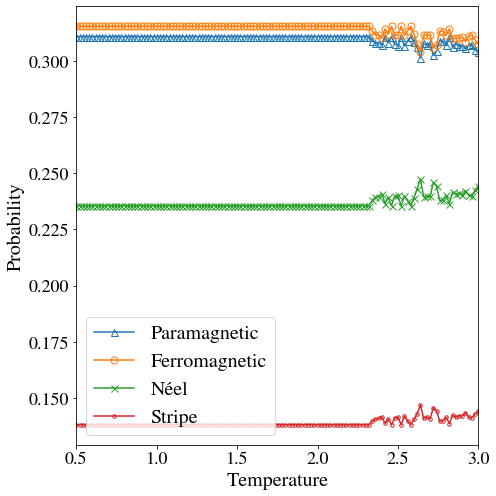

Predicting: 100%|██████████| 155/155 [00:19<00:00,  7.77repetitions/s]


Prediction for 2 neurons in hidden layer
T_c = 2.093444117252642


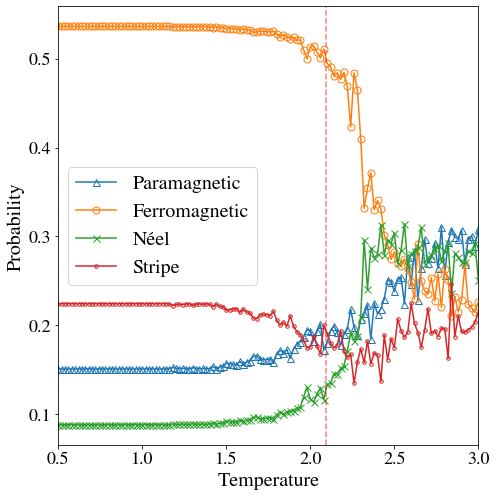

Predicting: 100%|██████████| 155/155 [00:19<00:00,  8.10repetitions/s]


Prediction for 3 neurons in hidden layer
T_c = 2.2699274523487


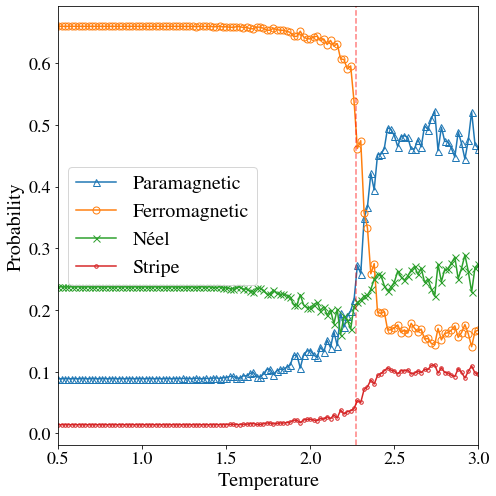

Predicting: 100%|██████████| 155/155 [00:20<00:00,  7.58repetitions/s]


Prediction for 4 neurons in hidden layer
T_c = 1.699805283626123


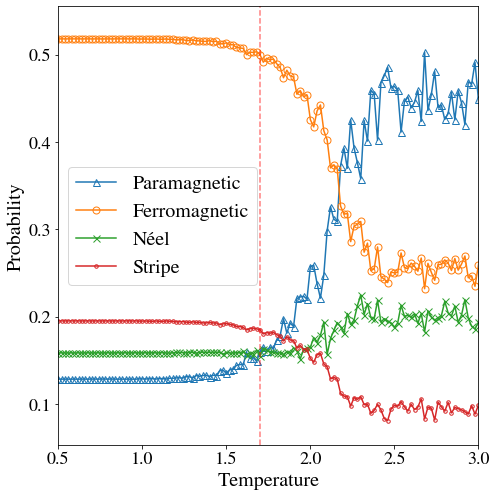

Predicting: 100%|██████████| 155/155 [00:19<00:00,  8.03repetitions/s]


Prediction for 5 neurons in hidden layer
T_c = 2.221593230933956


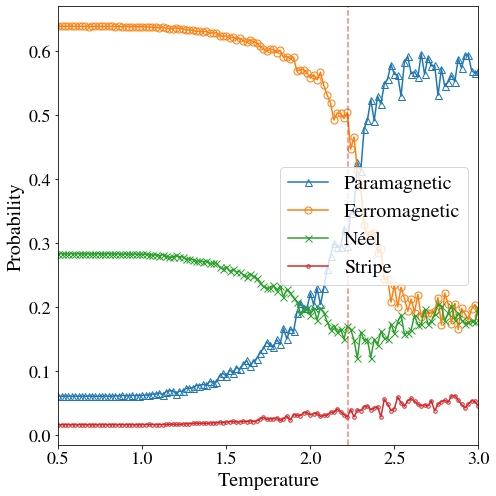

Predicting: 100%|██████████| 155/155 [00:18<00:00,  8.38repetitions/s]


Prediction for 6 neurons in hidden layer
T_c = 2.394459281498614


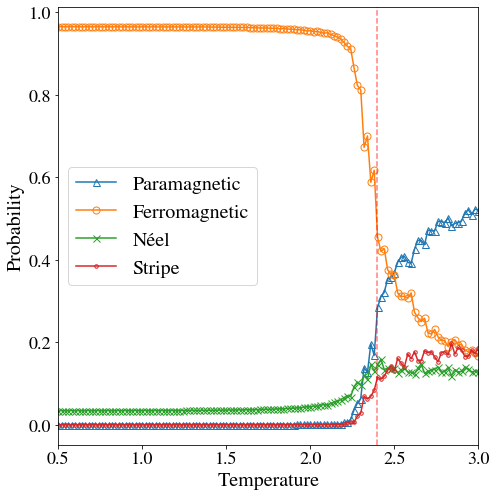

Predicting: 100%|██████████| 155/155 [00:23<00:00,  6.68repetitions/s]


Prediction for 7 neurons in hidden layer
T_c = 2.343524844490816


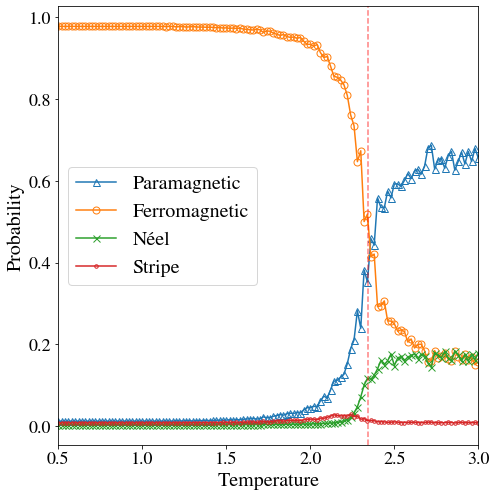

Predicting: 100%|██████████| 155/155 [00:23<00:00,  6.61repetitions/s]


Prediction for 8 neurons in hidden layer
T_c = 2.390251311701881


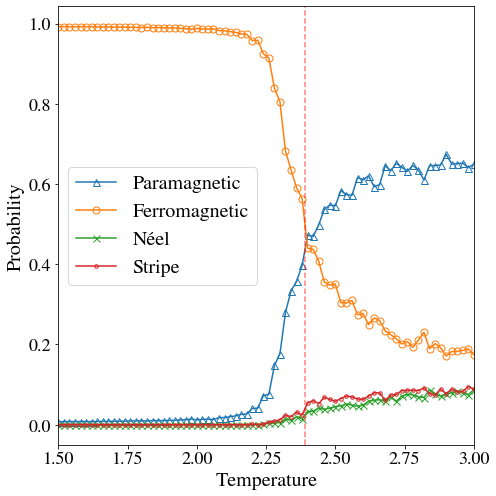

Predicting: 100%|██████████| 155/155 [00:19<00:00,  8.05repetitions/s]


Prediction for 9 neurons in hidden layer
T_c = 2.447794672764811


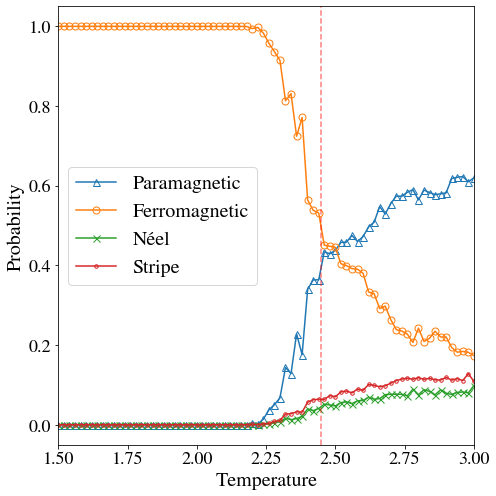

Predicting: 100%|██████████| 155/155 [00:22<00:00,  6.75repetitions/s]


Prediction for 10 neurons in hidden layer
T_c = 2.3835059161231946


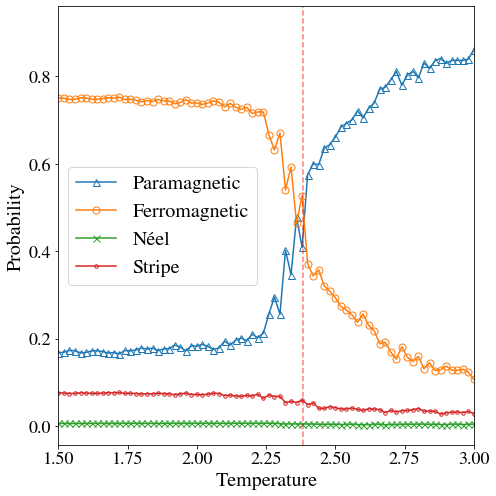

Predicting: 100%|██████████| 155/155 [00:20<00:00,  7.49repetitions/s]


Prediction for 20 neurons in hidden layer
T_c = 2.3987733891371863


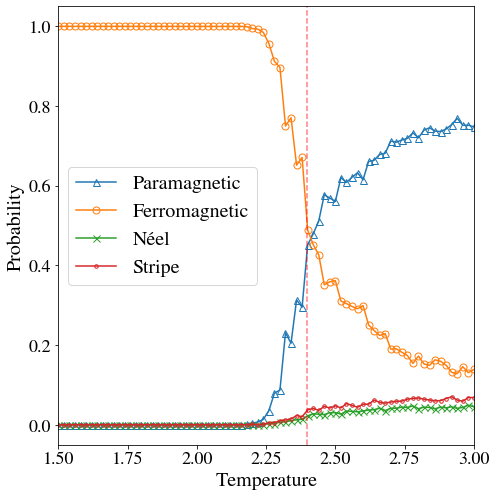

Predicting: 100%|██████████| 155/155 [00:20<00:00,  7.58repetitions/s]


Prediction for 40 neurons in hidden layer
T_c = 2.4028966950966826


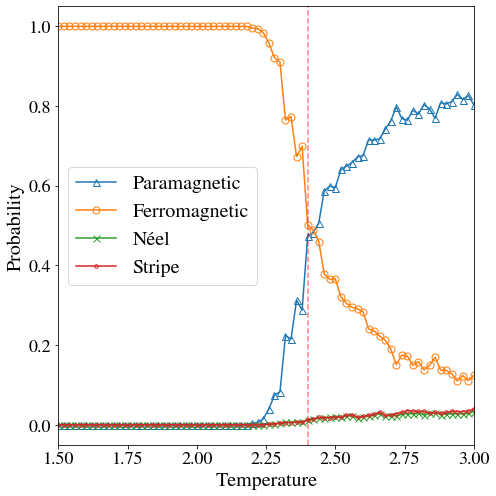

Predicting: 100%|██████████| 155/155 [00:22<00:00,  6.97repetitions/s]


Prediction for 60 neurons in hidden layer
T_c = 2.352146306638825


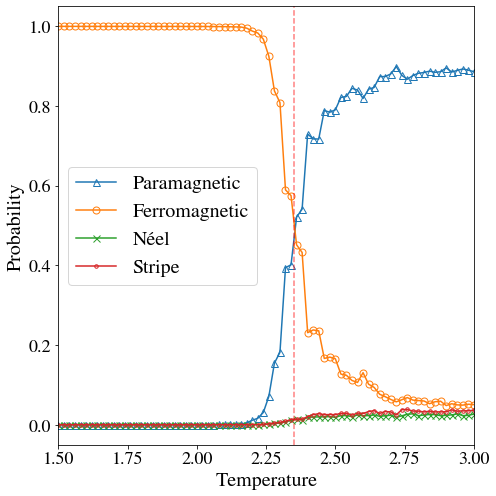

Predicting: 100%|██████████| 155/155 [00:20<00:00,  7.54repetitions/s]


Prediction for 80 neurons in hidden layer
T_c = 2.405800122059185


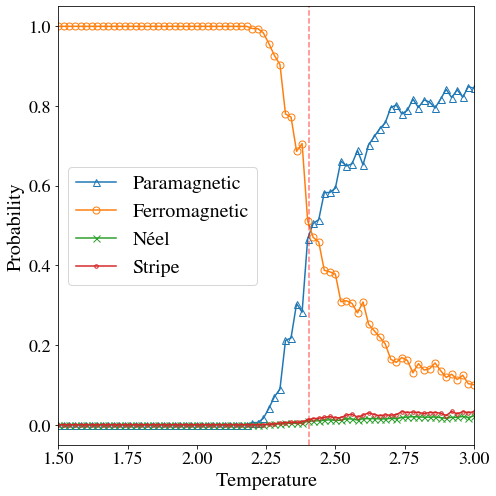

Predicting: 100%|██████████| 155/155 [00:20<00:00,  7.42repetitions/s]


Prediction for 100 neurons in hidden layer
T_c = 2.3469271798502076


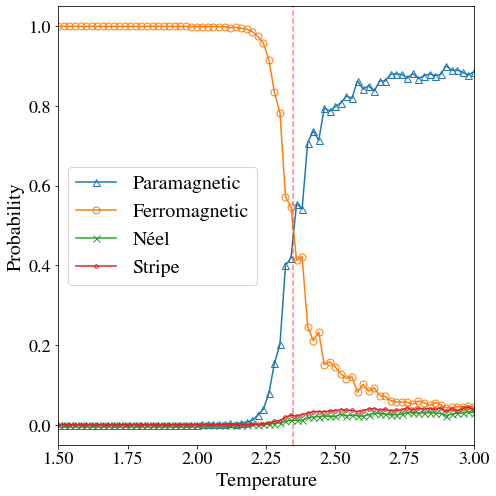

Predicting: 100%|██████████| 155/155 [00:22<00:00,  6.77repetitions/s]


Prediction for 150 neurons in hidden layer
T_c = 2.354567443220166


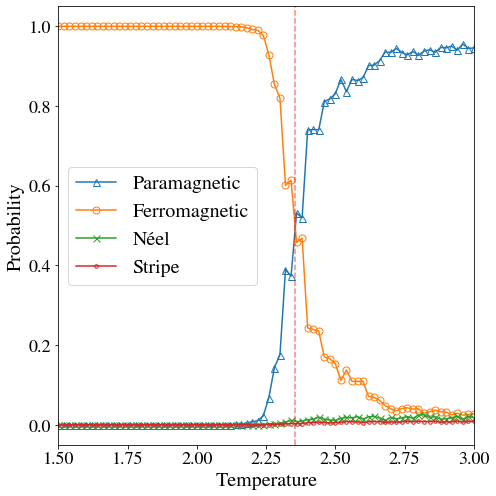

Predicting: 100%|██████████| 155/155 [00:21<00:00,  7.05repetitions/s]


Prediction for 200 neurons in hidden layer
T_c = 2.3148066304687727


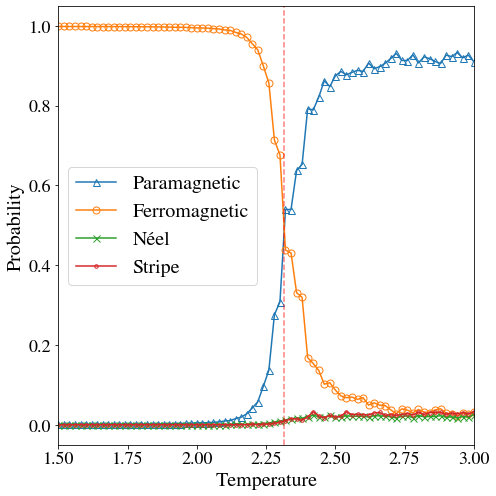

Predicting: 100%|██████████| 155/155 [00:28<00:00,  5.52repetitions/s]


Prediction for 250 neurons in hidden layer
T_c = 2.3296164906398


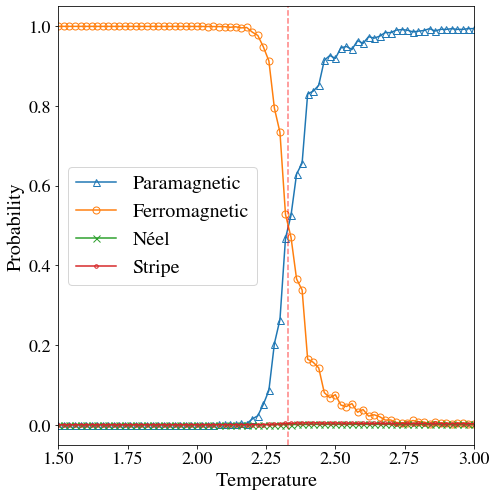

Predicting: 100%|██████████| 155/155 [00:39<00:00,  3.96repetitions/s]


Prediction for 300 neurons in hidden layer
T_c = 2.317304132140315


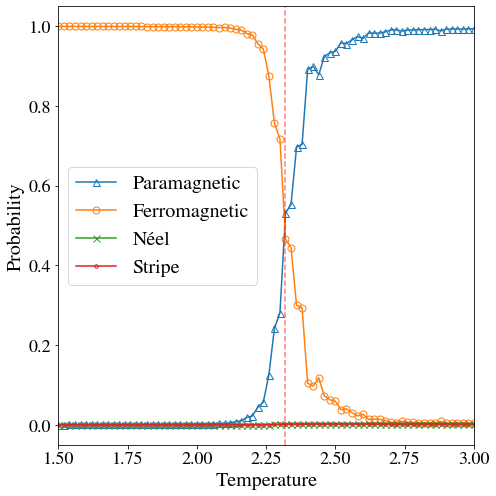

Predicting: 100%|██████████| 155/155 [00:36<00:00,  4.23repetitions/s]


Prediction for 350 neurons in hidden layer
T_c = 2.315310681460911


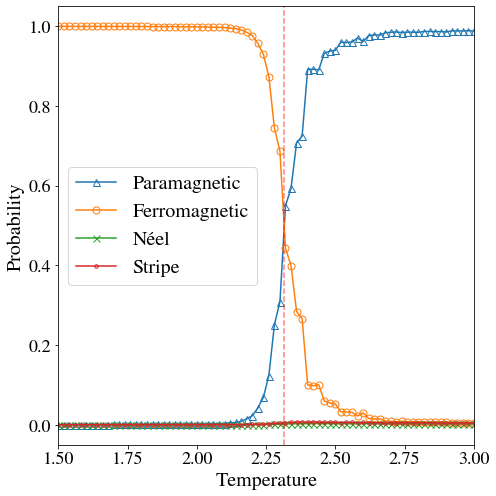

Predicting: 100%|██████████| 155/155 [00:26<00:00,  5.77repetitions/s]


Prediction for 400 neurons in hidden layer
T_c = 2.308880379799678


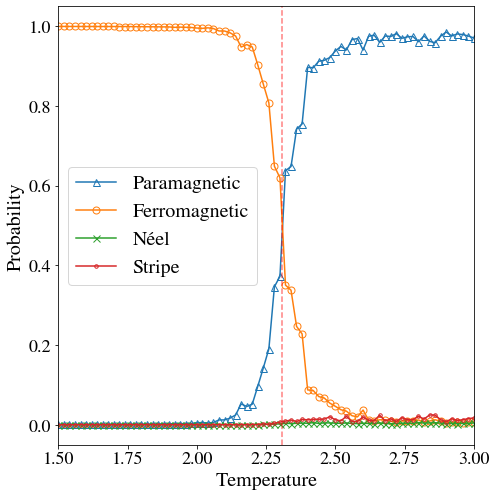

Predicting: 100%|██████████| 155/155 [00:24<00:00,  6.42repetitions/s]


Prediction for 450 neurons in hidden layer
T_c = 2.318077588469175


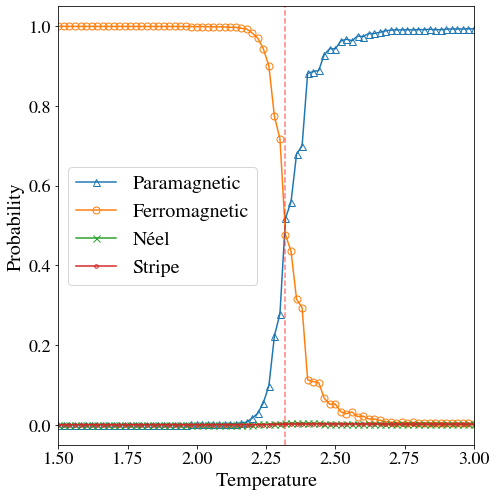

Predicting: 100%|██████████| 155/155 [00:22<00:00,  6.78repetitions/s]


Prediction for 500 neurons in hidden layer
T_c = 2.3080760758167407


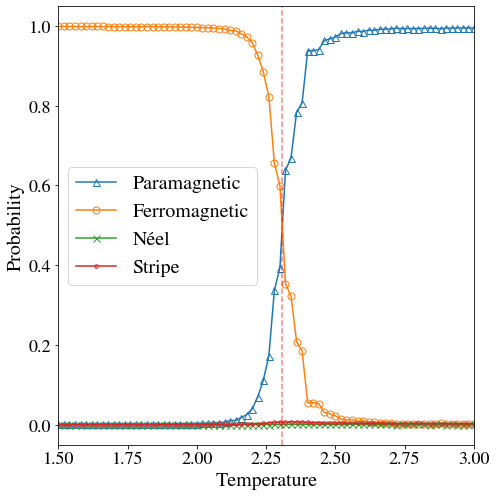

Predicting: 100%|██████████| 155/155 [00:24<00:00,  6.36repetitions/s]


Prediction for 550 neurons in hidden layer
T_c = 2.312235418556422


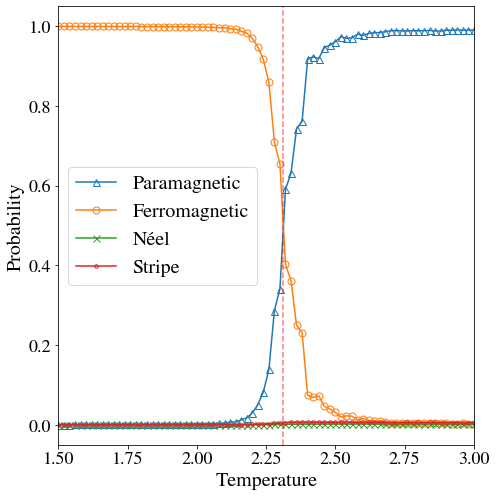

Predicting: 100%|██████████| 155/155 [00:24<00:00,  6.25repetitions/s]


Prediction for 600 neurons in hidden layer
T_c = 2.30874707805246


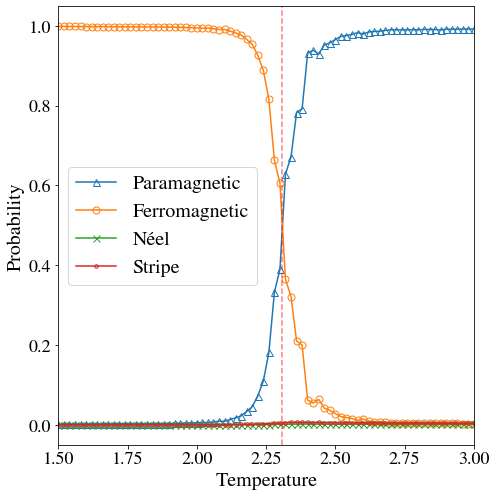

Predicting: 100%|██████████| 155/155 [00:25<00:00,  6.15repetitions/s]


Prediction for 650 neurons in hidden layer
T_c = 2.309109932843872


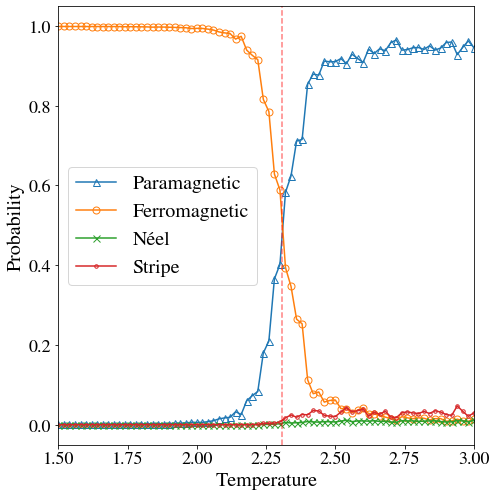

Predicting: 100%|██████████| 155/155 [00:25<00:00,  6.06repetitions/s]


Prediction for 700 neurons in hidden layer
T_c = 2.309962172267096


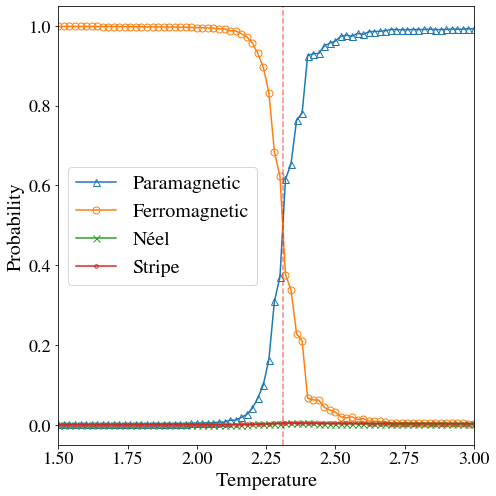

Predicting: 100%|██████████| 155/155 [00:25<00:00,  6.08repetitions/s]


Prediction for 750 neurons in hidden layer
T_c = 2.30627394115716


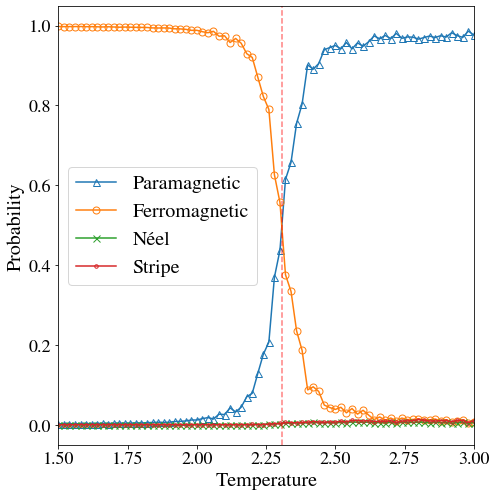

Predicting: 100%|██████████| 155/155 [00:26<00:00,  5.88repetitions/s]


Prediction for 800 neurons in hidden layer
T_c = 2.3079584543375526


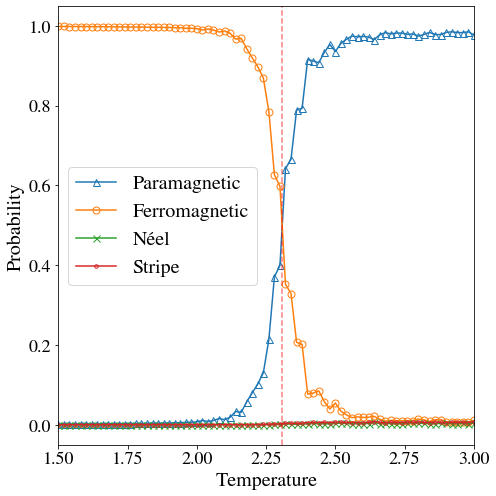

Predicting: 100%|██████████| 155/155 [00:27<00:00,  5.68repetitions/s]


Prediction for 850 neurons in hidden layer
T_c = 2.301982074219663


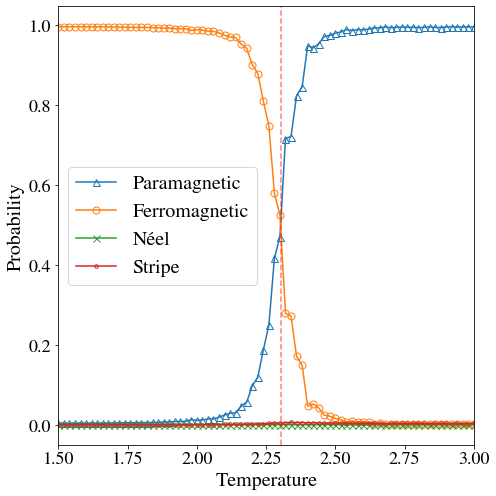

Predicting: 100%|██████████| 155/155 [00:39<00:00,  3.94repetitions/s]


Prediction for 900 neurons in hidden layer
T_c = 2.3028576859245367


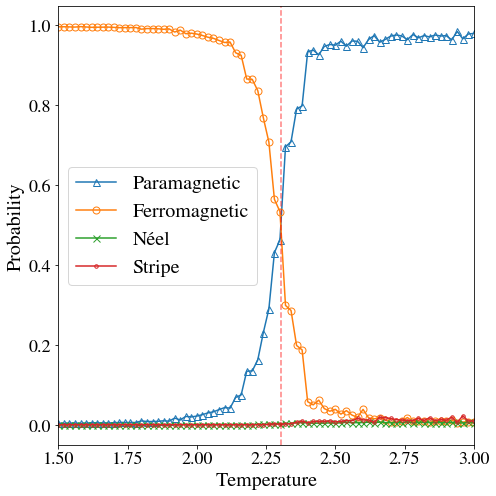

Predicting: 100%|██████████| 155/155 [00:48<00:00,  3.19repetitions/s]


Prediction for 950 neurons in hidden layer
T_c = 2.3096747478959356


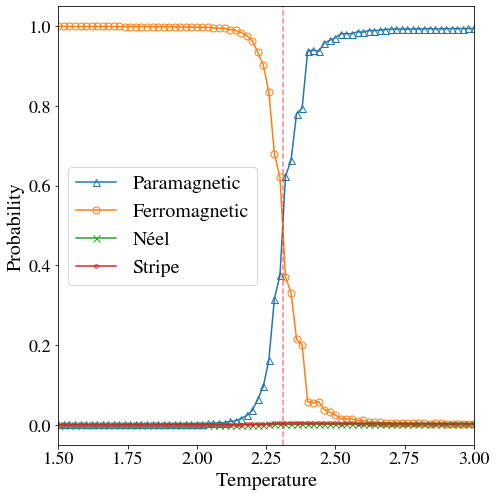

Predicting: 100%|██████████| 155/155 [00:48<00:00,  3.18repetitions/s]


Prediction for 1000 neurons in hidden layer
T_c = 2.309804262799802


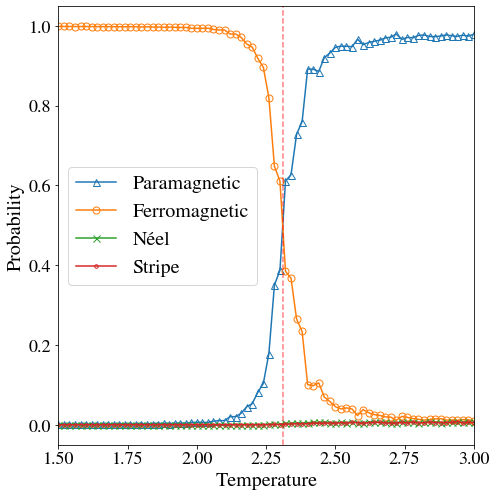

In [9]:
critical_temperatures = []

for neuron in neurons:
    index = neurons.index(neuron)

    model_path = os.path.join(modelsfolder, f'dnn_all_n{neuron}_DO02.h5')

    dnn = keras.models.load_model(model_path)

    prediction = auxLib.predictor(L, dnn, sim_images, neuron, 
                                training=['para', 'ferro', 'neel', 'stripe'],
                                directory=resultsfolder, 
                                reshape = True, 
                                verbose=False, 
                                save_prediction=True)

    para, ferro, neel, stripe = prediction.T

    print(f'Prediction for {neuron} neurons in hidden layer')

    plt.figure(figsize=(7, 7))
    plt.plot(temperature, para, '^-', label='Paramagnetic', markerfacecolor='none', markersize=7)
    plt.plot(temperature, ferro, 'o-', label='Ferromagnetic', markerfacecolor='none', markersize=7)
    plt.plot(temperature, neel, 'x-', label='Néel', markerfacecolor='none', markersize=7)
    plt.plot(temperature, stripe, '.-', label='Stripe', markerfacecolor='none', markersize=7)
    
    if neuron<8:
        plt.xlim((0.5, 3))
    else:
        plt.xlim((1.5, 3))
    plt.xlabel('Temperature')
    plt.ylabel('Probability')
    plt.legend()

    if max(ferro)<0.5:
        tc = 0
    else:
        index_half = np.where(ferro > 0.5)[0][-1]
        # Interpolation:
        tc = temperature[index_half] + (ferro[index_half]-0.5)*(temperature[index_half+1] - temperature[index_half]) / (ferro[index_half] - ferro[index_half+1])
        plt.axvline(x=tc,  color = 'red', linestyle = '--', alpha = 0.5)

    critical_temperatures.append(tc)
    print(f'T_c = {tc}')
    plt.savefig(os.path.join(resultsfolder, f'{neuron}neurons.pdf'))
    plt.show()

# Transition temperatures

In [10]:
critical_temperatures

[0,
 2.093444117252642,
 2.2699274523487,
 1.699805283626123,
 2.221593230933956,
 2.394459281498614,
 2.343524844490816,
 2.390251311701881,
 2.447794672764811,
 2.3835059161231946,
 2.3987733891371863,
 2.4028966950966826,
 2.352146306638825,
 2.405800122059185,
 2.3469271798502076,
 2.354567443220166,
 2.3148066304687727,
 2.3296164906398,
 2.317304132140315,
 2.315310681460911,
 2.308880379799678,
 2.318077588469175,
 2.3080760758167407,
 2.312235418556422,
 2.30874707805246,
 2.309109932843872,
 2.309962172267096,
 2.30627394115716,
 2.3079584543375526,
 2.301982074219663,
 2.3028576859245367,
 2.3096747478959356,
 2.309804262799802]

In [13]:
temp = pd.DataFrame((np.concatenate((np.array(neurons).reshape(len(neurons),1), 
                                    np.array(critical_temperatures).reshape(len(neurons),1)),axis=1)), 
                                    columns=['Neurons','Temperature'])
temp.to_csv(os.path.join(resultsfolder, 'critical_temperatures.csv'), index=False)

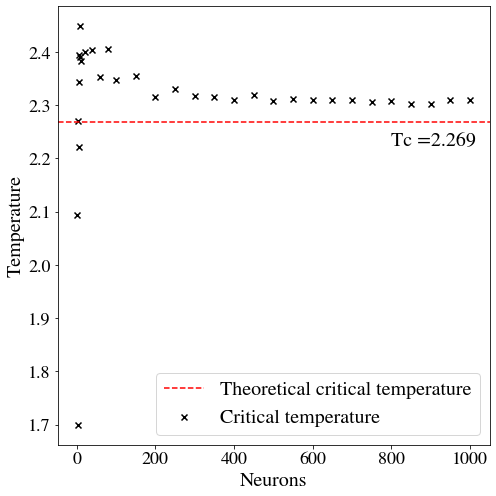

In [23]:
temp = pd.read_csv(os.path.join(resultsfolder, f'critical_temperatures.csv'))

plt.figure(figsize=(7, 7))
plt.scatter(temp['Neurons'][1:],temp['Temperature'][1:], marker='x', color='black', label='Critical temperature')
plt.axhline(y=2.269, color = 'red', linestyle = '--', label = 'Theoretical critical temperature')
plt.xlabel('Neurons')
plt.ylabel('Temperature')

plt.text(800, 2.25, rf'Tc ={2.269}', color='black', 
        verticalalignment='top', horizontalalignment='left', fontsize=20)

plt.legend(loc='lower right')
plt.savefig(os.path.join(os.getcwd(), resultsfolder, 'critical_temperatures.pdf'))
plt.show()

# When talking about percolation

In [ ]:
datadf = {"Densidad":densities, "Temperatura":critical_temperatures}

temp_df = pd.DataFrame(datadf)

temp_df.to_csv(os.path.join(resultsfolder, 'temp_dnn_all.csv'), index=False)

densi = np.arange(0.0,1.002,0.002)
curva = densi*0
for i in range(len(densi)):
    if densi[i]<0.592746:
        curva[i] = 0
    elif densi[i]<0.89:
        curva[i] = -(0.983)/(np.log(densi[i]-0.592746))  
        last_i = i

for i in range(last_i, len(densi)):
     curva[i] = curva[last_i] + 1.7 * (densi[i]-densi[last_i])

#plt.figure(figsize=(10,7))
plt.plot(temp_df['Densidad'],temp_df['Temperatura']/2.269)#np.array(temp_df['Temperatura'])[-1],'x--')
plt.plot(densi,curva,'r')
plt.xlim(0.4,1)
plt.legend(temp_df.columns)
plt.show()